**Importing the Required Python Libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pickle import dump
import tensorflow as tf
from google.colab import files
import io
from tensorflow.keras.models import Sequential, model_from_json

Defining this Function 

In [3]:
def trainDataSet():
    uploaded = files.upload()
    df = pd.read_excel(io.BytesIO(uploaded['train.xls']))
    try:
        df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
        df.drop(["a"], axis=1, inplace=True)
        df = df.drop([0], axis=0, inplace=False)
        df.duplicated().sum()
        df = df.drop_duplicates()
    except:
        df = df
    
    arr = df.to_numpy()
    X = arr[:, 0:22]
    Y = arr[:,22]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    dump(scaler, open('scaler.pkl', 'wb'))
    return (X_train, X_test, Y_train, Y_test, scaler)


In [4]:
def currentDataSet(data):
    X_train, X_test, Y_train, Y_test, scaler = trainDataSet()
    X_input = data.to_numpy()
    X_input = scaler.transform(X_input)
    return X_input


In [5]:
(X_train, X_test, Y_train, Y_test, scaler) = trainDataSet()

Saving train.xls to train.xls


In [6]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.float64)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
Y_test = tf.convert_to_tensor(Y_test, dtype=tf.float64)

In [7]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)
X_test, Y_test = smt.fit_resample(X_test, Y_test)

In [8]:
aclass_weights = { 0: 0.4, 1: 0.60}

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [ keras.Input(shape=(22,)),
      layers.Dense(15, activation = "sigmoid"),
      layers.Dense(8, activation = "sigmoid"),
      layers.Dense(6, activation = "sigmoid"),
      layers.Dense(3, activation = "sigmoid"),
      layers.Dense(1, activation = "sigmoid", name = "output")])


In [67]:
model.compile(
     optimizer=keras.optimizers.Adam(),
     loss=keras.losses.BinaryCrossentropy(),
     metrics=[keras.metrics.TruePositives(), keras.metrics.FalseNegatives(), keras.metrics.FalsePositives(), keras.metrics.TrueNegatives(), keras.metrics.Recall(), keras.metrics.Precision(), keras.metrics.BinaryAccuracy(), keras.metrics.AUC()])

In [68]:
history = model.fit(X_train, Y_train, epochs = 100 , class_weight = aclass_weights)

Epoch 1/100
1093/1093 [==============================] - 5s 3ms/step - loss: 0.2538 - true_positives_1: 14380.0000 - false_negatives_1: 3096.0000 - false_positives_1: 6541.0000 - true_negatives_1: 10935.0000 - recall_1: 0.8228 - precision_1: 0.6873 - binary_accuracy: 0.7243 - auc_1: 0.8176
Epoch 2/100
1093/1093 [==============================] - 3s 3ms/step - loss: 0.2535 - true_positives_1: 14391.0000 - false_negatives_1: 3085.0000 - false_positives_1: 6461.0000 - true_negatives_1: 11015.0000 - recall_1: 0.8235 - precision_1: 0.6901 - binary_accuracy: 0.7269 - auc_1: 0.8182
Epoch 3/100
1093/1093 [==============================] - 3s 3ms/step - loss: 0.2534 - true_positives_1: 14401.0000 - false_negatives_1: 3075.0000 - false_positives_1: 6514.0000 - true_negatives_1: 10962.0000 - recall_1: 0.8240 - precision_1: 0.6885 - binary_accuracy: 0.7257 - auc_1: 0.8183
Epoch 4/100
1093/1093 [==============================] - 3s 3ms/step - loss: 0.2534 - true_positives_1: 14391.0000 - false_nega

In [14]:
results = model.evaluate(X_test, Y_test)

365/365 [==============================] - 1s 2ms/step - loss: 0.5894 - true_positives: 4158.0000 - false_negatives: 1677.0000 - false_positives: 1910.0000 - true_negatives: 3925.0000 - recall: 0.7126 - precision: 0.6852 - binary_accuracy: 0.6926 - auc: 0.7628


In [39]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [71]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [40]:
model.save('saved_model/my_model')

365/365 [==============================] - 1s 1ms/step


Text(0, 0.5, 'True Positive Rate')

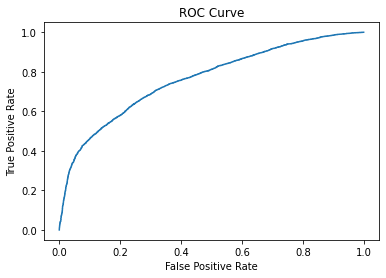

In [15]:
from sklearn.metrics import roc_curve
Y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
desired_recall = 0.7

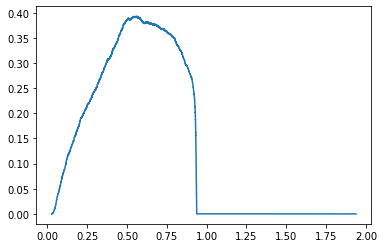

In [16]:
plt.plot(threshold, tpr-fpr)

In [17]:
YJI = threshold[np.argmax(tpr-fpr)]

In [18]:
print(tpr[np.argmax(tpr-fpr)], fpr[np.argmax(tpr-fpr)])

0.6443873179091688 0.2512425021422451


In [19]:
print(YJI) #optimum threshold value using Youden's J Statistic

0.56243265


In [20]:
Y_pred = model.predict(X_test)

365/365 [==============================] - 1s 1ms/step


In [21]:
credit = 850 - 550*Y_pred

In [22]:
credit

array([[772.7499 ],
       [433.50507],
       [336.03967],
       ...,
       [384.72012],
       [377.0628 ],
       [642.2366 ]], dtype=float32)

In [23]:
credit.shape

(11670, 1)

In [65]:
idx = 11646
print("Default Status: ",Y_test[idx], " Credit Score : ", credit[idx]," Probability of Default: ", Y_pred[idx])

Default Status:  1.0  Credit Score :  [542.46545]  Probability of Default:  [0.5591538]


array([723.2106], dtype=float32)

array([0.23052627], dtype=float32)

In [75]:
arr = np.array([1,2,3,4,4,5,5])

In [77]:
arr.reshape(7,-1)

array([[1],
       [2],
       [3],
       [4],
       [4],
       [5],
       [5]])